In [1]:
#importing datasets and analysing it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing dataset
dataset=pd.read_csv('cancer.csv')
print(dataset.describe())
print(dataset.dtypes)
print(dataset.isnull().mean())


                 id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  5.690000e+02   569.000000  ...      569.000000               569.000000
mean   3.037183e+07    14.127292  ...        0.290076                 0.083946
std    1.250206e+08     3.524049  ...        0.061867                 0.018061
min    8.670000e+03     6.981000  ...        0.156500                 0.055040
25%    8.692180e+05    11.700000  ...        0.250400                 0.071460
50%    9.060240e+05    13.370000  ...        0.282200                 0.080040
75%    8.813129e+06    15.780000  ...        0.317900                 0.092080
max    9.113205e+08    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean     

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#changing categorical data to
dataset.drop(['id'],axis='columns',inplace=True)
for i in range(0,569):
    if(dataset.iloc[i,0]=='M'):
        dataset.iloc[i,0]=int(1)
    else:
        dataset.iloc[i,0]=int(0)
        
dataset.diagnosis=pd.to_numeric(dataset['diagnosis'])

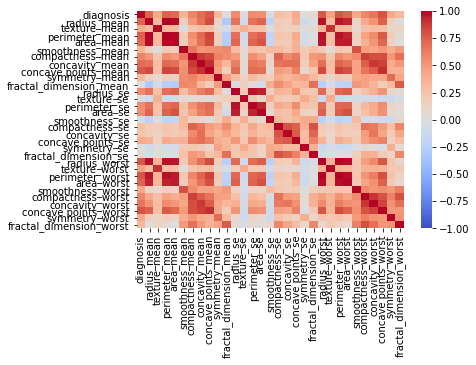

In [3]:
#correlation heatmap
corr=dataset.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap="coolwarm",xticklabels=dataset.columns,
               yticklabels=dataset.columns)

In [0]:
#train-test-split and handling class-imbalance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,1:], 
                                                    dataset.iloc[:,0], 
                                                    test_size = 0.30,
                                                    random_state = 0)


from imblearn.over_sampling import SMOTE
# Resample the minority class.
sm = SMOTE(random_state=27, sampling_strategy=1.0)
# Fit the model to generate the data.
ovx_tr, ovy_tr = sm.fit_sample(x_train,y_train)

In [0]:
#feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(ovx_tr)
x_test = sc.transform(x_test)

y_train=ovy_tr

In [6]:
#selecting best features after analysing score
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)


from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(classifier, 
           k_features=19, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

sfs1 = sfs1.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s finished

[2020-05-12 05:05:27] Features: 29/19 -- score: 0.9777291990161133[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.9s finished

[2020-05-12 05:05:28] Featur

In [7]:
#storing the selected features in a list
selected_feat= list(sfs1.k_feature_idx_)
print(selected_feat)

[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 15, 17, 19, 20, 21, 24, 26, 28]


In [0]:
#modifying our test and train sets 
x_train=x_train[:,[0, 1, 2, 3, 4, 6, 7, 8, 
                   10, 11, 12, 15, 17, 19, 20, 21, 24, 26, 28]]

x_test=x_test[:,[0, 1, 2, 3, 4, 6, 7, 8, 
                 10, 11, 12, 15, 17, 19, 20, 21, 24, 26, 28]]

In [0]:
#fitting model and predicting values
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,probability=True)

classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_trpr=classifier.predict(x_train)

In [10]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("TRAIN SET ACCURACY =",accuracy_score(y_train, y_trpr))
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred))

TRAIN SET ACCURACY = 0.9839357429718876
TEST SET ACCURACY = 0.9649122807017544


_________________TEST SET__________________
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



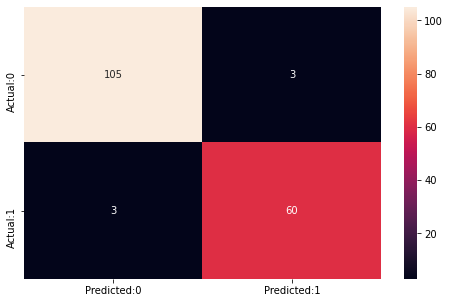

In [11]:
#visualising and analysing test set prediction results
print("_________________TEST SET__________________")
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [0]:
#ROC curve for better analysis
!pip install scikit-plot 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


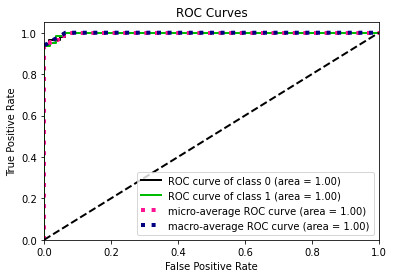

In [15]:
import scikitplot as skplt
y_probas = classifier.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()